# Convolutional Neural Network(CNN)

###### The aim of this project is to propose a label of various fruit images. Fruit dataset has been downloaded from the Kaggle. Build the CNN model with Convolutional, pooling and Flatten layer. Adding batch normalization and dropout layer makes simpler model to increase the accuracy and decrease the loss at the same time. Batch Normalization improves the performance and stability during training. Dropout minimize the overfitting of the model. Using those layers and hyper-parameters, Test the classifier and graph the accuracy and loss with 6 optimizers which are adam, sgd, adamax, adagrad, Adadelta, Nadam, and Ftrl

### Packages

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Activation
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator

# Data

In [3]:
train_image_file= "fruits-360/Training"

In [4]:
# list of fruits to model
#fruit_list = ["Kiwi", "Banana", "Avocado ripe","Apricot", "Avocado","Blueberry","Corn","Cocos", "Clementine", "Dates","Mandarine", "Orange",
              #  "Limes", "Fig","Lemon", "Pear","Peach", "Plum", "Raspberry", "Strawberry", "Pineapple", "Pomegranate","Raspberry"]
fruit_list = ["Kiwi", "Banana","Apricot", "Avocado","Cocos", "Clementine", "Dates","Mandarine", "Orange",
                "Limes","Lemon","Peach", "Plum", "Strawberry", "Pineapple", "Pomegranate"]
# number of fruit classes (i.e. fruits)
number_of_class = len(fruit_list)
number_of_class

16

In [5]:
#Train : Validation = 8:2
train_data_generator = ImageDataGenerator(
  rescale = 1/255,
  validation_split = 0.2)

In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_image_array = train_data_generator.flow_from_directory(train_image_file, 
                                                
                                                    subset = 'training',
                                                    target_size = (32,32),       
                                                    class_mode = "categorical",
                                                    classes = fruit_list,
                                                    batch_size = 32,
                                                    seed = 123)
#Found 6171 images

Found 6171 images belonging to 16 classes.


In [7]:
# validation images
valid_image_array = train_data_generator.flow_from_directory(train_image_file, 
                                                    subset = 'validation',
                                                    target_size = (32,32),
                                                    class_mode = "categorical",
                                                    classes = fruit_list,
                                                    batch_size = 32,
                                                    seed = 123)
#Found 1538 images

Found 1538 images belonging to 16 classes.


In [8]:
# number of training samples
train_samples = train_image_array.samples
train_samples
# number of validation samples
valid_samples = valid_image_array.samples

# define number of epochs
epochs = 10

In [9]:
valid_samples

1538

### CNN Model

In [10]:
model = Sequential()
#padding = "same" --> apply padding --> restrict reducing the image size. 
model.add(Conv2D(16, (3, 3), input_shape = (32, 32, 3),  padding = "same", activation = 'relu'))
model.add(BatchNormalization())

# Second hidden layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
# Use max pooling
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
   #Bath norm vs Dropout
  #Batch increase to speed up optimization
  #dropout -> to control the overfitting 
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))
model.add(Activation("softmax"))

### Adam

In [11]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(
  # training data
  train_image_array,
  steps_per_epoch = int(train_samples / 32), 
  epochs = 10,
  # validation data
  validation_data = valid_image_array,
  validation_steps = int(valid_samples / 32)
)
adam_accuracy = history.history['accuracy']
adam_val_accuracy = history.history['val_accuracy']
adam_loss = history.history['loss']
adam_val_loss = history.history['val_loss']
test_image_file = "fruits-360/Training"
test_data_generator = ImageDataGenerator(rescale = 1/255)
test_generator = test_data_generator.flow_from_directory(
  test_image_file,
  target_size = (32,32),
  class_mode = "categorical",
  classes = fruit_list,
  batch_size = 1,
  shuffle = False,
  seed = 123)
#Found 2592 images
evaluation = model.evaluate(test_generator, 
                     steps = int(test_generator.samples))
adam_Evaluation_Loss=evaluation[0]
adam_Evaluation_accuracy = evaluation[1]

Epoch 1/10
192/192 [==============================] - 16s 85ms/step - loss: 0.8280 - accuracy: 0.7506 - val_loss: 3.4861 - val_accuracy: 0.2044
Epoch 2/10
192/192 [==============================] - 16s 84ms/step - loss: 0.1821 - accuracy: 0.9334 - val_loss: 0.7485 - val_accuracy: 0.7819
Epoch 3/10
192/192 [==============================] - 17s 87ms/step - loss: 0.0783 - accuracy: 0.9749 - val_loss: 6.1303e-04 - val_accuracy: 1.0000
Epoch 4/10
192/192 [==============================] - 16s 81ms/step - loss: 0.1146 - accuracy: 0.9611 - val_loss: 0.5631 - val_accuracy: 0.8997
Epoch 5/10
192/192 [==============================] - 15s 81ms/step - loss: 0.0723 - accuracy: 0.9739 - val_loss: 0.1003 - val_accuracy: 0.9779
Epoch 6/10
192/192 [==============================] - 16s 84ms/step - loss: 0.0414 - accuracy: 0.9857 - val_loss: 0.0358 - val_accuracy: 0.9883
Epoch 7/10
192/192 [==============================] - 17s 86ms/step - loss: 0.0416 - accuracy: 0.9860 - val_loss: 1.2438 - val_accur

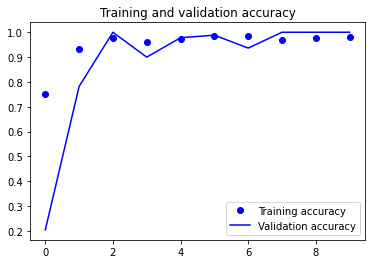

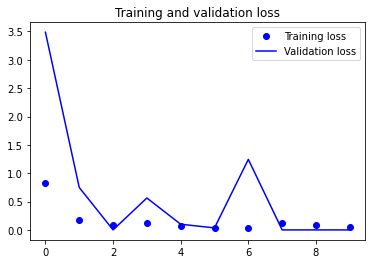

In [12]:
plt.rcParams.update({'font.size': 10})
epochs = range(len(adam_accuracy))
plt.plot(epochs, adam_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, adam_val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, adam_loss, 'bo', label='Training loss')
plt.plot(epochs, adam_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

### SGD Optimizer

In [13]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(
  # training data
  train_image_array,
  steps_per_epoch = int(train_samples / 32), 
  epochs = 10,
  # validation data
  validation_data = valid_image_array,
  validation_steps = int(valid_samples / 32)
)
sgd_accuracy = history.history['accuracy']
sgd_val_accuracy = history.history['val_accuracy']
sgd_loss = history.history['loss']
sgd_val_loss = history.history['val_loss']
test_image_file =  "fruits-360/Training"
test_data_generator = ImageDataGenerator(rescale = 1/255)
test_generator = test_data_generator.flow_from_directory(
  test_image_file,
  target_size = (32,32),
  class_mode = "categorical",
  classes = fruit_list,
  batch_size = 1,
  shuffle = False,
  seed = 123)
#Found 2592 images
evaluation = model.evaluate(test_generator, 
                     steps = int(test_generator.samples))
sgd_Evaluation_Loss=evaluation[0]
sgd_Evaluation_accuracy = evaluation[1]


Epoch 1/10
192/192 [==============================] - 16s 84ms/step - loss: 0.1751 - accuracy: 0.9637 - val_loss: 0.6549 - val_accuracy: 0.8743
Epoch 2/10
192/192 [==============================] - 17s 88ms/step - loss: 0.0402 - accuracy: 0.9865 - val_loss: 0.0238 - val_accuracy: 0.9902
Epoch 3/10
192/192 [==============================] - 18s 93ms/step - loss: 0.0398 - accuracy: 0.9862 - val_loss: 0.0211 - val_accuracy: 0.9909
Epoch 4/10
192/192 [==============================] - 18s 93ms/step - loss: 0.0320 - accuracy: 0.9894 - val_loss: 0.1677 - val_accuracy: 0.9629
Epoch 5/10
192/192 [==============================] - 20s 102ms/step - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0330 - val_accuracy: 0.9902
Epoch 6/10
192/192 [==============================] - 17s 88ms/step - loss: 0.0255 - accuracy: 0.9912 - val_loss: 0.1041 - val_accuracy: 0.9837
Epoch 7/10
192/192 [==============================] - 16s 85ms/step - loss: 0.0289 - accuracy: 0.9902 - val_loss: 0.1833 - val_accuracy

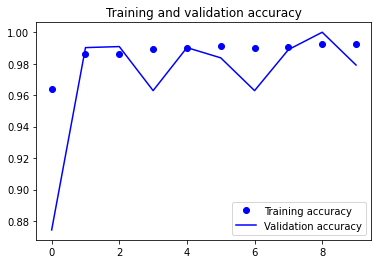

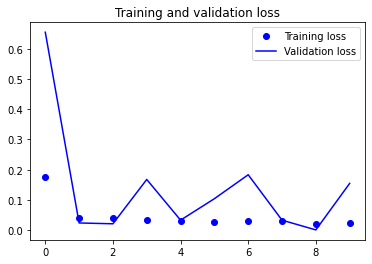

In [14]:
plt.rcParams.update({'font.size': 10})
epochs = range(len(sgd_accuracy))
plt.plot(epochs, sgd_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, sgd_val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, sgd_loss, 'bo', label='Training loss')
plt.plot(epochs, sgd_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

### RMSprop

In [15]:
model.compile(optimizer = 'RMSprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(
  # training data
  train_image_array,
  steps_per_epoch = int(train_samples / 32), 
  epochs = 10,
  # validation data
  validation_data = valid_image_array,
  validation_steps = int(valid_samples / 32)
)
RMSprop_accuracy = history.history['accuracy']
RMSprop_val_accuracy = history.history['val_accuracy']
RMSprop_loss = history.history['loss']
RMSprop_val_loss = history.history['val_loss']
test_image_file = "fruits-360/Training"
test_data_generator = ImageDataGenerator(rescale = 1/255)
test_generator = test_data_generator.flow_from_directory(
  test_image_file,
  target_size = (32,32),
  class_mode = "categorical",
  classes = fruit_list,
  batch_size = 1,
  shuffle = False,
  seed = 123)
#Found 2592 images
evaluation = model.evaluate(test_generator, 
                     steps = int(test_generator.samples))
RMSprop_Evaluation_Loss=evaluation[0]
RMSprop_Evaluation_accuracy = evaluation[1]

Epoch 1/10
192/192 [==============================] - 19s 97ms/step - loss: 0.0411 - accuracy: 0.9884 - val_loss: 0.1482 - val_accuracy: 0.9863
Epoch 2/10
192/192 [==============================] - 19s 101ms/step - loss: 0.0386 - accuracy: 0.9896 - val_loss: 0.0078 - val_accuracy: 0.9980
Epoch 3/10
192/192 [==============================] - 18s 96ms/step - loss: 0.0274 - accuracy: 0.9915 - val_loss: 0.0624 - val_accuracy: 0.9876
Epoch 4/10
192/192 [==============================] - 18s 94ms/step - loss: 0.0285 - accuracy: 0.9940 - val_loss: 0.1105 - val_accuracy: 0.9902
Epoch 5/10
192/192 [==============================] - 17s 90ms/step - loss: 0.0167 - accuracy: 0.9953 - val_loss: 0.1168 - val_accuracy: 0.9902
Epoch 6/10
192/192 [==============================] - 17s 90ms/step - loss: 0.0331 - accuracy: 0.9920 - val_loss: 1.2731e-05 - val_accuracy: 1.0000
Epoch 7/10
192/192 [==============================] - 18s 95ms/step - loss: 0.0258 - accuracy: 0.9933 - val_loss: 5.5844e-04 - val_

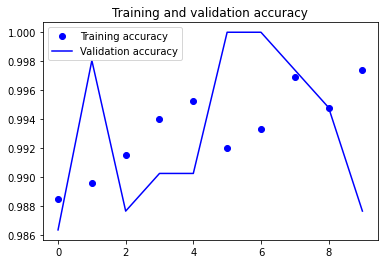

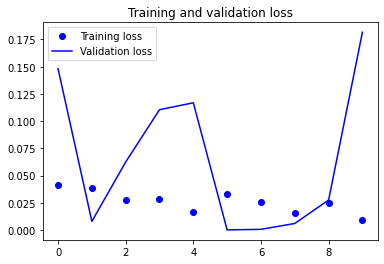

In [16]:
plt.rcParams.update({'font.size': 10})
epochs = range(len(RMSprop_accuracy))
plt.plot(epochs, RMSprop_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, RMSprop_val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, RMSprop_loss, 'bo', label='Training loss')
plt.plot(epochs, RMSprop_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

### Adadelta Optimizer

In [17]:
model.compile(optimizer = 'Adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(
  # training data
  train_image_array,
  steps_per_epoch = int(train_samples / 32), 
  epochs = 10,
  # validation data
  validation_data = valid_image_array,
  validation_steps = int(valid_samples / 32)
)
Adadelta_accuracy = history.history['accuracy']
Adadelta_val_accuracy = history.history['val_accuracy']
Adadelta_loss = history.history['loss']
Adadelta_val_loss = history.history['val_loss']
test_image_file = "fruits-360/Training"
test_data_generator = ImageDataGenerator(rescale = 1/255)
test_generator = test_data_generator.flow_from_directory(
  test_image_file,
  target_size = (32,32),
  class_mode = "categorical",
  classes = fruit_list,
  batch_size = 1,
  shuffle = False,
  seed = 123)
#Found 2592 images
evaluation = model.evaluate(test_generator, 
                     steps = int(test_generator.samples))
Adadelta_Evaluation_Loss=evaluation[0]
Adadelta_Evaluation_accuracy = evaluation[1]

Epoch 1/10
192/192 [==============================] - 16s 85ms/step - loss: 0.0273 - accuracy: 0.9943 - val_loss: 0.1816 - val_accuracy: 0.9876
Epoch 2/10
192/192 [==============================] - 17s 87ms/step - loss: 0.0203 - accuracy: 0.9958 - val_loss: 0.1816 - val_accuracy: 0.9876
Epoch 3/10
192/192 [==============================] - 17s 87ms/step - loss: 0.0212 - accuracy: 0.9961 - val_loss: 0.1759 - val_accuracy: 0.9876
Epoch 4/10
192/192 [==============================] - 17s 87ms/step - loss: 0.0206 - accuracy: 0.9953 - val_loss: 0.1743 - val_accuracy: 0.9883
Epoch 5/10
192/192 [==============================] - 16s 81ms/step - loss: 0.0257 - accuracy: 0.9936 - val_loss: 0.1803 - val_accuracy: 0.9876
Epoch 6/10
192/192 [==============================] - 16s 81ms/step - loss: 0.0132 - accuracy: 0.9972 - val_loss: 0.1725 - val_accuracy: 0.9883
Epoch 7/10
192/192 [==============================] - 16s 81ms/step - loss: 0.0163 - accuracy: 0.9954 - val_loss: 0.1784 - val_accuracy:

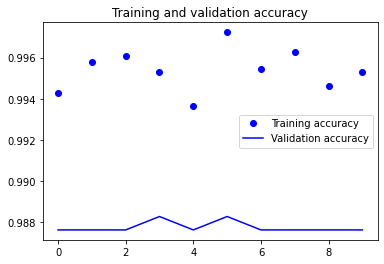

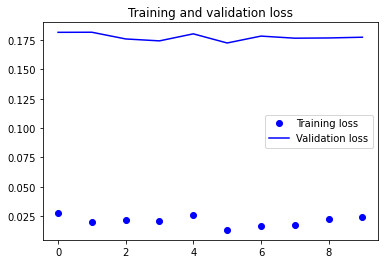

In [18]:
plt.rcParams.update({'font.size': 10})
epochs = range(len(RMSprop_accuracy))
plt.plot(epochs, Adadelta_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, Adadelta_val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, Adadelta_loss, 'bo', label='Training loss')
plt.plot(epochs, Adadelta_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

### Adagrad Optimizer

In [19]:
model.compile(optimizer = 'Adagrad', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(
  # training data
  train_image_array,
  steps_per_epoch = int(train_samples / 32), 
  epochs = 10,
  # validation data
  validation_data = valid_image_array,
  validation_steps = int(valid_samples / 32)
)
Adagrad_accuracy = history.history['accuracy']
Adagrad_val_accuracy = history.history['val_accuracy']
Adagrad_loss = history.history['loss']
Adagrad_val_loss = history.history['val_loss']
test_image_file = "fruits-360/Training"
test_data_generator = ImageDataGenerator(rescale = 1/255)
test_generator = test_data_generator.flow_from_directory(
  test_image_file,
  target_size = (32,32),
  class_mode = "categorical",
  classes = fruit_list,
  batch_size = 1,
  shuffle = False,
  seed = 123)
#Found 2592 images
evaluation = model.evaluate(test_generator, 
                     steps = int(test_generator.samples))
Adagrad_Evaluation_Loss=evaluation[0]
Adagrad_Evaluation_accuracy = evaluation[1]

Epoch 1/10
192/192 [==============================] - 15s 80ms/step - loss: 0.0133 - accuracy: 0.9976 - val_loss: 0.2094 - val_accuracy: 0.9850
Epoch 2/10
192/192 [==============================] - 15s 79ms/step - loss: 0.0081 - accuracy: 0.9979 - val_loss: 0.1646 - val_accuracy: 0.9896
Epoch 3/10
192/192 [==============================] - 15s 79ms/step - loss: 0.0124 - accuracy: 0.9977 - val_loss: 0.1484 - val_accuracy: 0.9902
Epoch 4/10
192/192 [==============================] - 15s 80ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.1583 - val_accuracy: 0.9896
Epoch 5/10
192/192 [==============================] - 15s 80ms/step - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.1465 - val_accuracy: 0.9902
Epoch 6/10
192/192 [==============================] - 15s 78ms/step - loss: 0.0059 - accuracy: 0.9976 - val_loss: 0.1582 - val_accuracy: 0.9896
Epoch 7/10
192/192 [==============================] - 16s 82ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.1572 - val_accuracy:

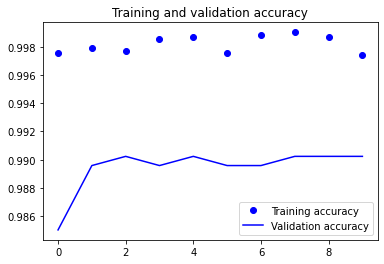

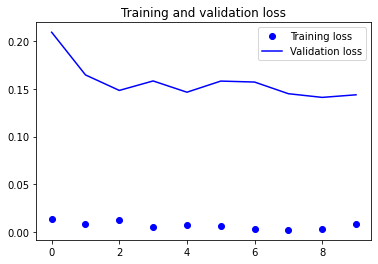

In [20]:
plt.rcParams.update({'font.size': 10})
epochs = range(len(RMSprop_accuracy))
plt.plot(epochs, Adagrad_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, Adagrad_val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, Adagrad_loss, 'bo', label='Training loss')
plt.plot(epochs, Adagrad_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

### Adamax Optimizer

In [21]:
model.compile(optimizer = 'Adamax', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(
  # training data
  train_image_array,
  steps_per_epoch = int(train_samples / 32), 
  epochs = 10,
  # validation data
  validation_data = valid_image_array,
  validation_steps = int(valid_samples / 32)
)
Adamax_accuracy = history.history['accuracy']
Adamax_val_accuracy = history.history['val_accuracy']
Adamax_loss = history.history['loss']
Adamax_val_loss = history.history['val_loss']
test_image_file = "fruits-360/Training"
test_data_generator = ImageDataGenerator(rescale = 1/255)
test_generator = test_data_generator.flow_from_directory(
  test_image_file,
  target_size = (32,32),
  class_mode = "categorical",
  classes = fruit_list,
  batch_size = 1,
  shuffle = False,
  seed = 123)
#Found 2592 images
evaluation = model.evaluate(test_generator, 
                     steps = int(test_generator.samples))
Adamax_Evaluation_Loss=evaluation[0]
Adamax_Evaluation_accuracy = evaluation[1]

Epoch 1/10
192/192 [==============================] - 15s 80ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0936 - val_accuracy: 0.9909
Epoch 2/10
192/192 [==============================] - 15s 80ms/step - loss: 0.0061 - accuracy: 0.9987 - val_loss: 0.1012 - val_accuracy: 0.9902
Epoch 3/10
192/192 [==============================] - 15s 79ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0967 - val_accuracy: 0.9902
Epoch 4/10
192/192 [==============================] - 16s 83ms/step - loss: 0.0041 - accuracy: 0.9985 - val_loss: 0.0620 - val_accuracy: 0.9935
Epoch 5/10
192/192 [==============================] - 16s 84ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.1423 - val_accuracy: 0.9902
Epoch 6/10
192/192 [==============================] - 15s 79ms/step - loss: 0.0043 - accuracy: 0.9980 - val_loss: 0.1096 - val_accuracy: 0.9902
Epoch 7/10
192/192 [==============================] - 15s 79ms/step - loss: 0.0037 - accuracy: 0.9984 - val_loss: 0.1374 - val_accuracy:

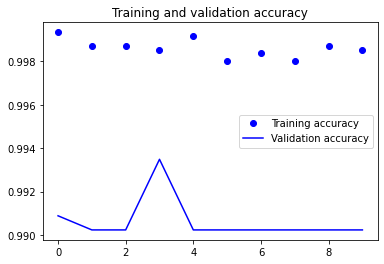

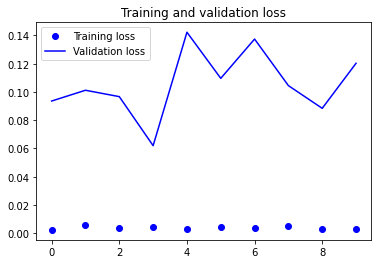

In [22]:
plt.rcParams.update({'font.size': 10})
epochs = range(len(RMSprop_accuracy))
plt.plot(epochs, Adamax_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, Adamax_val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, Adamax_loss, 'bo', label='Training loss')
plt.plot(epochs, Adamax_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

### Nadam Optimizer

In [23]:
model.compile(optimizer = 'Nadam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(
  # training data
  train_image_array,
  steps_per_epoch = int(train_samples / 32), 
  epochs = 10,
  # validation data
  validation_data = valid_image_array,
  validation_steps = int(valid_samples / 32)
)
Nadam_accuracy = history.history['accuracy']
Nadam_val_accuracy = history.history['val_accuracy']
Nadam_loss = history.history['loss']
Nadam_val_loss = history.history['val_loss']
test_image_file = "fruits-360/Training"
test_data_generator = ImageDataGenerator(rescale = 1/255)
test_generator = test_data_generator.flow_from_directory(
  test_image_file,
  target_size = (32,32),
  class_mode = "categorical",
  classes = fruit_list,
  batch_size = 1,
  shuffle = False,
  seed = 123)
#Found 2592 images
evaluation = model.evaluate(test_generator, 
                     steps = int(test_generator.samples))
Nadam_Evaluation_Loss=evaluation[0]
Nadam_Evaluation_accuracy = evaluation[1]

Epoch 1/10
192/192 [==============================] - 18s 92ms/step - loss: 0.0514 - accuracy: 0.9923 - val_loss: 0.0526 - val_accuracy: 0.9928
Epoch 2/10
192/192 [==============================] - 17s 90ms/step - loss: 0.0312 - accuracy: 0.9951 - val_loss: 1.0418e-05 - val_accuracy: 1.0000
Epoch 3/10
192/192 [==============================] - 17s 90ms/step - loss: 0.0590 - accuracy: 0.9909 - val_loss: 0.0812 - val_accuracy: 0.9805
Epoch 4/10
192/192 [==============================] - 17s 90ms/step - loss: 0.0392 - accuracy: 0.9933 - val_loss: 0.0019 - val_accuracy: 0.9993
Epoch 5/10
192/192 [==============================] - 17s 89ms/step - loss: 0.0509 - accuracy: 0.9915 - val_loss: 0.1528 - val_accuracy: 0.9876
Epoch 6/10
192/192 [==============================] - 17s 90ms/step - loss: 0.0158 - accuracy: 0.9963 - val_loss: 0.0299 - val_accuracy: 0.9954
Epoch 7/10
192/192 [==============================] - 17s 91ms/step - loss: 0.0287 - accuracy: 0.9932 - val_loss: 0.0972 - val_accur

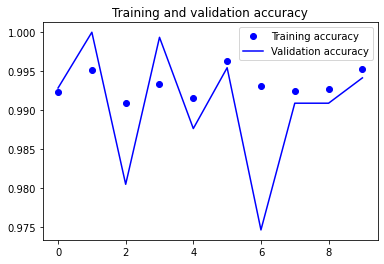

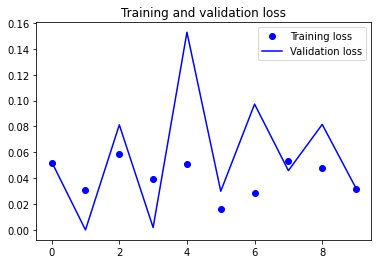

In [24]:
plt.rcParams.update({'font.size': 10})
epochs = range(len(RMSprop_accuracy))
plt.plot(epochs, Nadam_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, Nadam_val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, Nadam_loss, 'bo', label='Training loss')
plt.plot(epochs, Nadam_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

### Ftrl Optimizer

In [25]:
model.compile(optimizer = 'Ftrl', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(
  # training data
  train_image_array,
  steps_per_epoch = int(train_samples / 32), 
  epochs = 10,
  # validation data
  validation_data = valid_image_array,
  validation_steps = int(valid_samples / 32)
)
Ftrl_accuracy = history.history['accuracy']
Ftrl_val_accuracy = history.history['val_accuracy']
Ftrl_loss = history.history['loss']
Ftrl_val_loss = history.history['val_loss']
test_image_file = "fruits-360/Training"
test_data_generator = ImageDataGenerator(rescale = 1/255)
test_generator = test_data_generator.flow_from_directory(
  test_image_file,
  target_size = (32,32),
  class_mode = "categorical",
  classes = fruit_list,
  batch_size = 1,
  shuffle = False,
  seed = 123)
#Found 2592 images
evaluation = model.evaluate(test_generator, 
                     steps = int(test_generator.samples))
FTrl_Evaluation_Loss=evaluation[0]
Ftrl_Evaluation_accuracy = evaluation[1]

Epoch 1/10
192/192 [==============================] - 17s 88ms/step - loss: 2.7581 - accuracy: 0.0640 - val_loss: 2.7725 - val_accuracy: 0.0638
Epoch 2/10
192/192 [==============================] - 16s 85ms/step - loss: 2.7726 - accuracy: 0.0562 - val_loss: 2.7725 - val_accuracy: 0.0638
Epoch 3/10
192/192 [==============================] - 15s 80ms/step - loss: 2.7725 - accuracy: 0.0583 - val_loss: 2.7725 - val_accuracy: 0.0638
Epoch 4/10
192/192 [==============================] - 15s 81ms/step - loss: 2.7725 - accuracy: 0.0557 - val_loss: 2.7725 - val_accuracy: 0.0632
Epoch 5/10
192/192 [==============================] - 16s 81ms/step - loss: 2.7725 - accuracy: 0.0591 - val_loss: 2.7725 - val_accuracy: 0.0638
Epoch 6/10
192/192 [==============================] - 16s 83ms/step - loss: 2.7725 - accuracy: 0.0599 - val_loss: 2.7725 - val_accuracy: 0.0638
Epoch 7/10
192/192 [==============================] - 16s 82ms/step - loss: 2.7725 - accuracy: 0.0603 - val_loss: 2.7725 - val_accuracy:

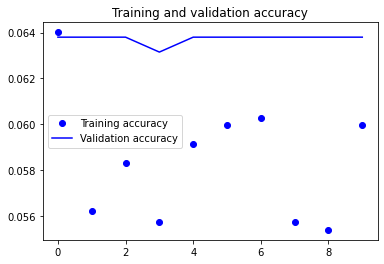

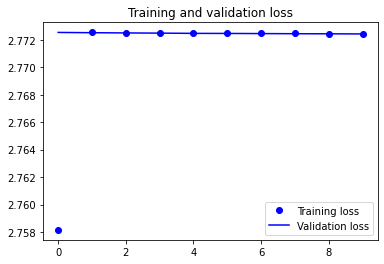

In [26]:
plt.rcParams.update({'font.size': 10})
epochs = range(len(RMSprop_accuracy))
plt.plot(epochs, Ftrl_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, Ftrl_val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, Ftrl_loss, 'bo', label='Training loss')
plt.plot(epochs, Ftrl_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


### Combined Accuracy & Loss Graph of all optimizer functions

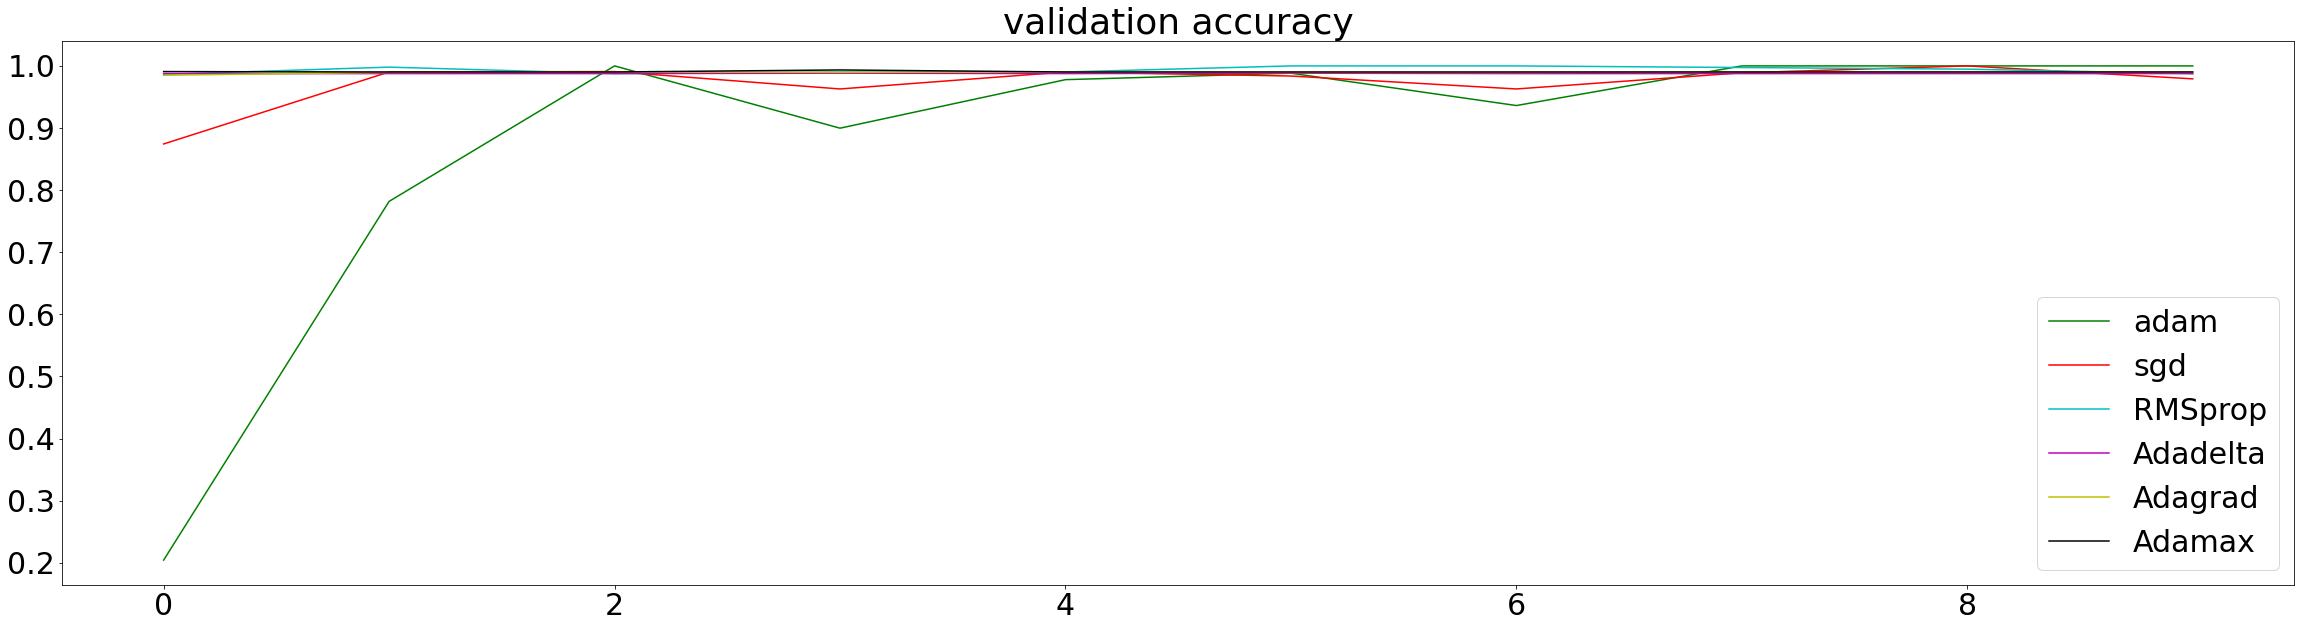

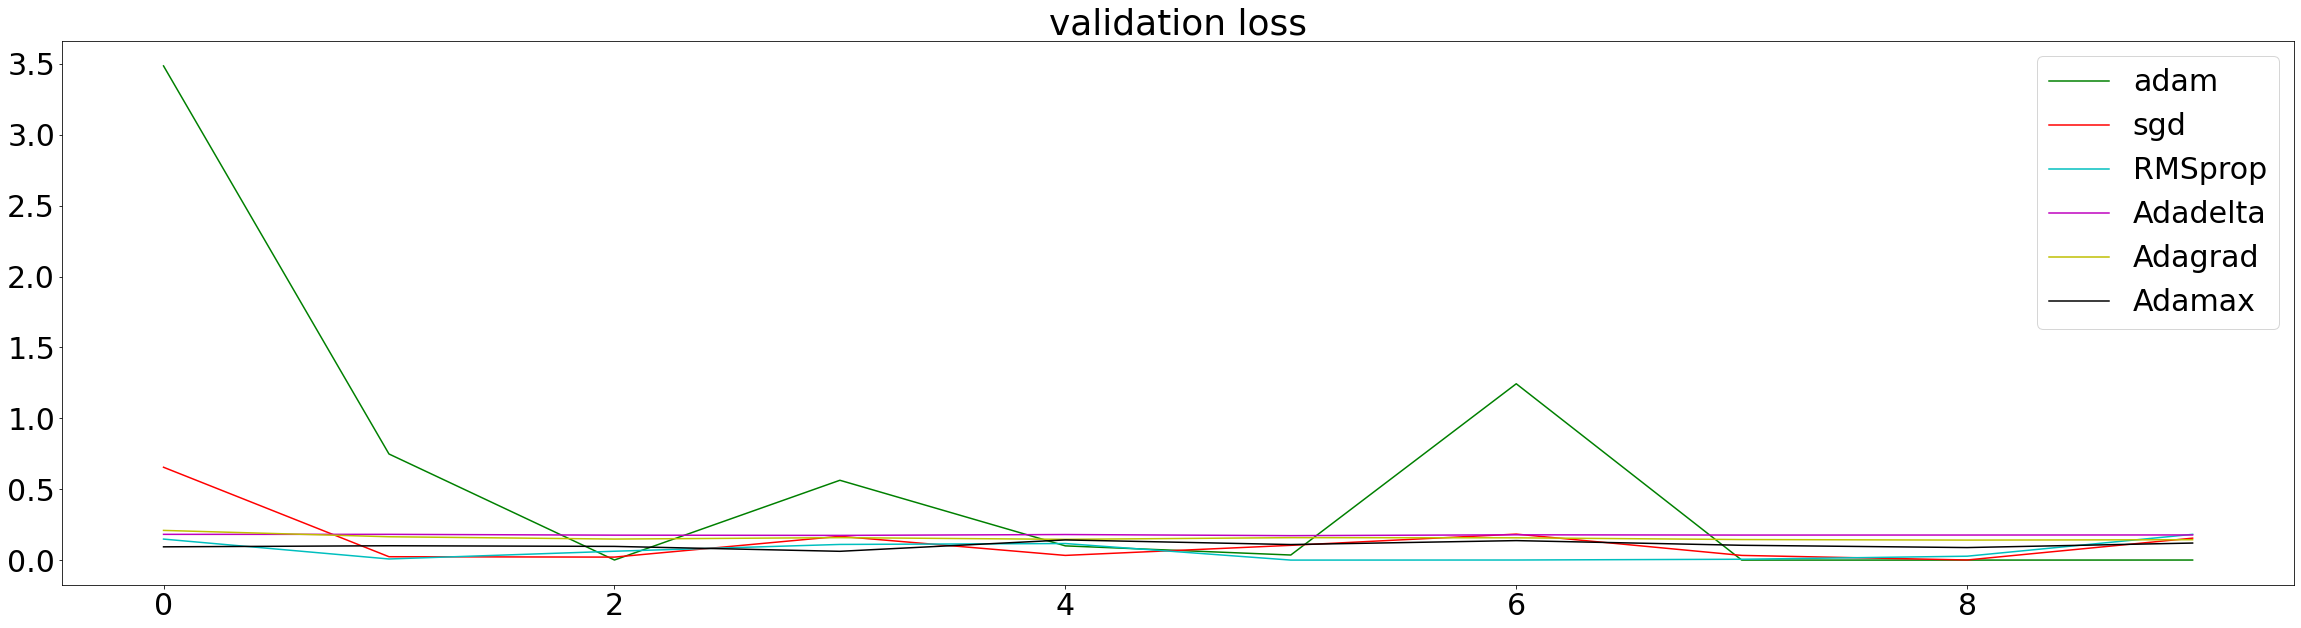

In [27]:
plt.rcParams.update({'font.size': 30})
epochs = range(len(adam_accuracy))
plt.figure(figsize=(40,10))
plt.plot(epochs, adam_val_accuracy, 'g', label='adam')
plt.plot(epochs, sgd_val_accuracy, 'r', label='sgd')
plt.plot(epochs, RMSprop_val_accuracy, 'c', label='RMSprop')
plt.plot(epochs, Adadelta_val_accuracy, 'm', label='Adadelta')
plt.plot(epochs, Adagrad_val_accuracy, 'y', label='Adagrad')
plt.plot(epochs, Adamax_val_accuracy, 'k', label='Adamax')
#plt.plot(epochs, Nadam_val_accuracy, 'w', label='Nadam')
#plt.plot(epochs, Ftrl_val_accuracy, 'b', label='Ftrl')
plt.title('validation accuracy')
plt.legend()
plt.figure(figsize=(40,10))
plt.plot(epochs, adam_val_loss, 'g', label='adam')
plt.plot(epochs, sgd_val_loss, 'r', label='sgd')
plt.plot(epochs, RMSprop_val_loss, 'c', label='RMSprop')
plt.plot(epochs, Adadelta_val_loss, 'm', label='Adadelta')
plt.plot(epochs, Adagrad_val_loss, 'y', label='Adagrad')
plt.plot(epochs, Adamax_val_loss, 'k', label='Adamax')
#plt.plot(epochs, Nadam_val_loss, 'w', label='Nadam')
#plt.plot(epochs, Ftrl_val_loss, 'b', label='Ftrl')
plt.title('validation loss')
plt.legend()
plt.show()

### Test Result

Text(0.5, 1.0, 'Test Loss')

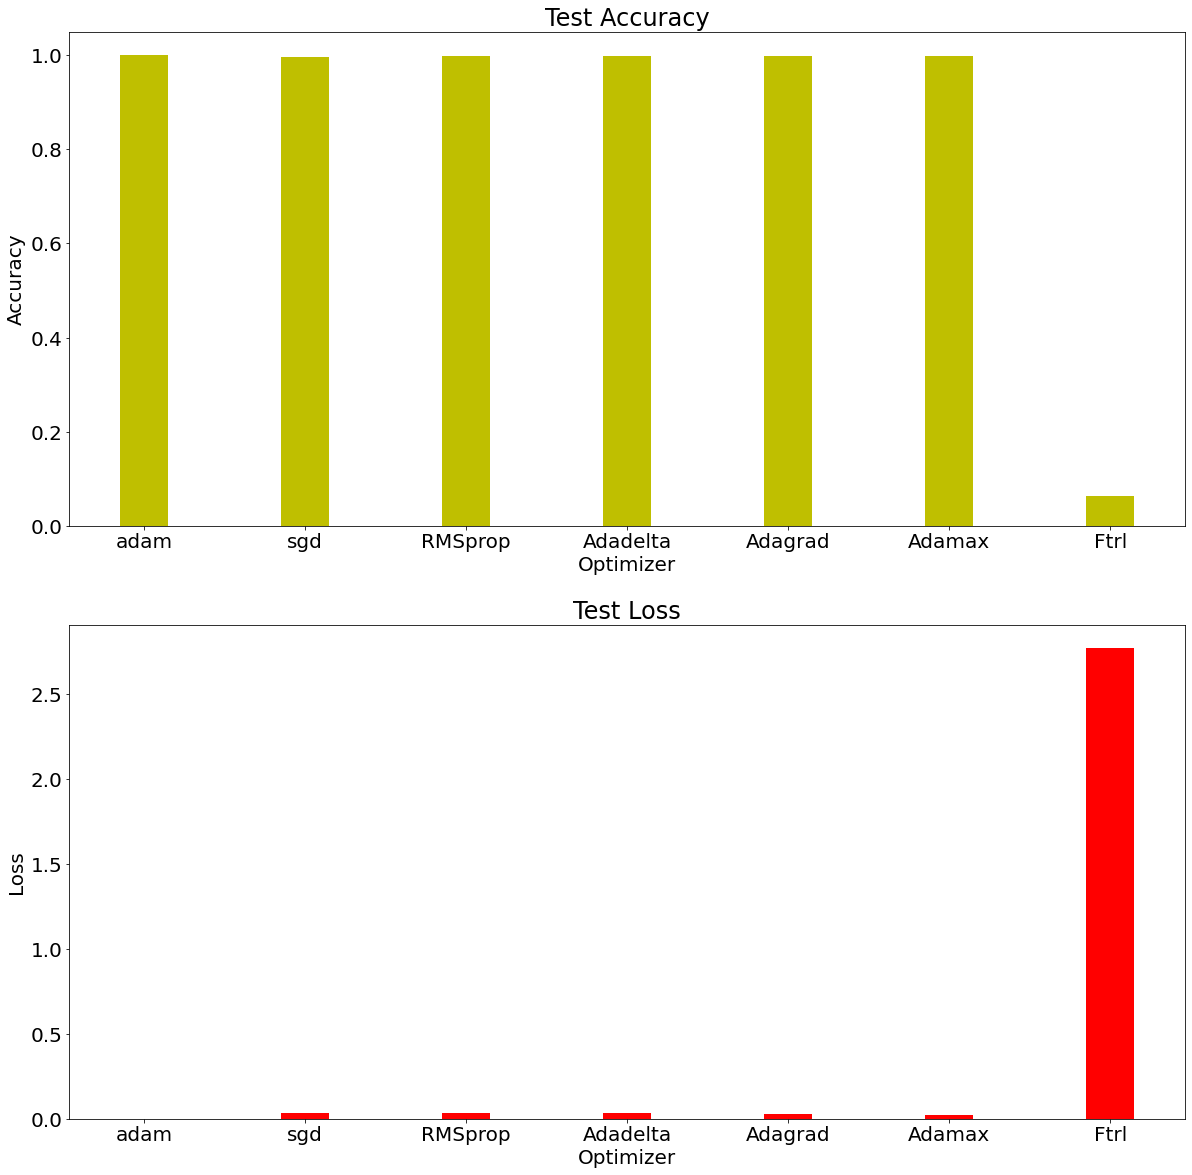

In [28]:
plt.rcParams.update({'font.size': 20})
G=[['adam','sgd','RMSprop','Adadelta','Adagrad','Adamax','Ftrl'],
 [adam_Evaluation_Loss,sgd_Evaluation_Loss,RMSprop_Evaluation_Loss,Adadelta_Evaluation_Loss,Adagrad_Evaluation_Loss,Adamax_Evaluation_Loss,FTrl_Evaluation_Loss],
[adam_Evaluation_accuracy,sgd_Evaluation_accuracy,RMSprop_Evaluation_accuracy,Adadelta_Evaluation_accuracy,Adagrad_Evaluation_accuracy,Adamax_Evaluation_accuracy,Ftrl_Evaluation_accuracy]]
X_lab=G[0][:]
Acc=G[2][:]
Loss = G[1][:]
Acc=([round(x,4) for x in Acc])
Loss=([round(x,4) for x in Loss])

width = 0.3

fig, (ax1,ax2) = plt.subplots(nrows=2)
fig.set_size_inches(20,20)
accGraph=ax1.bar(X_lab, Acc, width = 0.3, color = 'y')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Optimizer')
ax1.set_title('Test Accuracy')

lossGraph=ax2.bar(X_lab, Loss, width = 0.3, color = 'r')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Optimizer')
ax2.set_title('Test Loss')